<a href="https://colab.research.google.com/github/herreraskarina/Exercises/blob/main/GitHub_Semana3_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

### Activity 1: Create a dataset from the data available at [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Select only the columns year, state, approval rate, SAEB note for math, SAEB note for portuguese and ideb (`ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`).

In [1]:
# importing pandas and mounting drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing data
df = pd.read_csv('/content/drive/MyDrive/ideb3.csv')

In [3]:
# selecting columns
df_colunas_select = df[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
df_colunas_select

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,53.9,167.80,165.60,2.3
1,2005,AC,49.3,151.80,149.60,1.8
2,2005,AC,48.8,163.60,155.80,1.9
3,2005,AC,48.8,159.00,153.39,1.9
4,2005,AC,74.7,138.00,134.19,2.3
...,...,...,...,...,...,...
294421,2019,SP,98.4,229.75,216.07,6.2
294422,2019,SP,92.9,305.85,296.39,6.2
294423,2019,SP,98.0,230.69,216.92,6.2
294424,2019,SP,98.0,230.69,216.92,6.2


In [31]:
# checking how many rows and columns the dataset has
df_colunas_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294426 entries, 0 to 294425
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ano                          294426 non-null  int64  
 1   sigla_uf                     294426 non-null  object 
 2   taxa_aprovacao               230833 non-null  float64
 3   nota_saeb_matematica         197870 non-null  float64
 4   nota_saeb_lingua_portuguesa  197870 non-null  float64
 5   ideb                         222045 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 23.8+ MB


In [16]:
# missing data for column
df_colunas_select.isna().sum()

ano                                0
sigla_uf                           0
taxa_aprovacao                 63593
nota_saeb_matematica           96556
nota_saeb_lingua_portuguesa    96556
ideb                           72381
dtype: int64

In [17]:
# percentage of missing data in each column
df_colunas_select.isna().sum()*100/len(df_colunas_select.index)

ano                             0.000000
sigla_uf                        0.000000
taxa_aprovacao                 21.598976
nota_saeb_matematica           32.794658
nota_saeb_lingua_portuguesa    32.794658
ideb                           24.583766
dtype: float64

In [32]:
# droping null data
drp_na = df_colunas_select.dropna()
drp_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197839 entries, 0 to 294425
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ano                          197839 non-null  int64  
 1   sigla_uf                     197839 non-null  object 
 2   taxa_aprovacao               197839 non-null  float64
 3   nota_saeb_matematica         197839 non-null  float64
 4   nota_saeb_lingua_portuguesa  197839 non-null  float64
 5   ideb                         197839 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.6+ MB


In [33]:
# dataset is clean
drp_na.isna().sum()

ano                            0
sigla_uf                       0
taxa_aprovacao                 0
nota_saeb_matematica           0
nota_saeb_lingua_portuguesa    0
ideb                           0
dtype: int64

### Activity 2: Select only the data referring to the year 2019 and group the data by state, considering the average.

In [30]:
# selecting only data from 2019
ideb_2019 = drp_na.loc[df['ano'] == 2019]
ideb_2019.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
8947,2019,AC,98.2,288.92,263.10,8.1
8948,2019,AC,96.5,254.78,231.63,6.8
8949,2019,AC,97.7,246.47,228.63,6.7
8950,2019,AC,97.6,256.67,231.75,6.9
8951,2019,AL,100.0,261.32,223.47,7.0


In [34]:
# grouping data by states
ideb2 = ideb_2019.groupby(by='sigla_uf').mean()
ideb2.head()

,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
sigla_uf,,,,,
AC,2019.0,88.857971,245.253478,237.995942,4.671739
AL,2019.0,92.258013,237.883189,231.412708,4.509295
AM,2019.0,87.171490,223.121965,219.773218,4.032397
AP,2019.0,82.363333,217.216667,215.831111,3.694444
BA,2019.0,83.492417,233.942537,230.205596,4.034125


In [35]:
# droping the column year
ideb = ideb2.drop('ano', axis=1)
ideb.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
sigla_uf,,,,
AC,88.857971,245.253478,237.995942,4.671739
AL,92.258013,237.883189,231.412708,4.509295
AM,87.171490,223.121965,219.773218,4.032397
AP,82.363333,217.216667,215.831111,3.694444
BA,83.492417,233.942537,230.205596,4.034125


In [36]:
# reseting index, so that the states ('sigla_uf') are not considered index
ideb = ideb.reset_index()
ideb.head()

,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,AC,88.857971,245.253478,237.995942,4.671739
1,AL,92.258013,237.883189,231.412708,4.509295
2,AM,87.171490,223.121965,219.773218,4.032397
3,AP,82.363333,217.216667,215.831111,3.694444
4,BA,83.492417,233.942537,230.205596,4.034125


### Activity 3: Standardize the data.

Given that each column of the dataset has different dimensions/standards, data standardization can be used.

In [37]:
# importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

In [38]:
# creating a variable to store the class
scaler = StandardScaler()

In [40]:
# creating a copy of the original dataset (this way the information about the states is safe). 
df_scaled = ideb.copy()
# Now the original dataset with the states is safe inside the variable ideb and the variable df_scaled stores a copy of it, which will be changed in the next step.

In [41]:
# droping the column that contains only non-numeric data
df_scaled.drop('sigla_uf', inplace=True, axis=1)
df_scaled.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,88.857971,245.253478,237.995942,4.671739
1,92.258013,237.883189,231.412708,4.509295
2,87.171490,223.121965,219.773218,4.032397
3,82.363333,217.216667,215.831111,3.694444
4,83.492417,233.942537,230.205596,4.034125


In [42]:
# applying the method fit_transform to standardize the numeric data
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)
df_scaled.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,-0.042238,0.080568,-0.016633,0.092154
1,0.792119,-0.437297,-0.532115,-0.201424
2,-0.456094,-1.474477,-1.443512,-1.063297
3,-1.635997,-1.889406,-1.752188,-1.674063
4,-1.358925,-0.714182,-0.626634,-1.060175


In [43]:
# including the states column back in the dataset
df_scaled['sigla_uf'] = ideb['sigla_uf']
df_scaled.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,sigla_uf
0,-0.042238,0.080568,-0.016633,0.092154,AC
1,0.792119,-0.437297,-0.532115,-0.201424,AL
2,-0.456094,-1.474477,-1.443512,-1.063297,AM
3,-1.635997,-1.889406,-1.752188,-1.674063,AP
4,-1.358925,-0.714182,-0.626634,-1.060175,BA


In [ ]:
# comparing correlations

In [44]:
import seaborn as sns

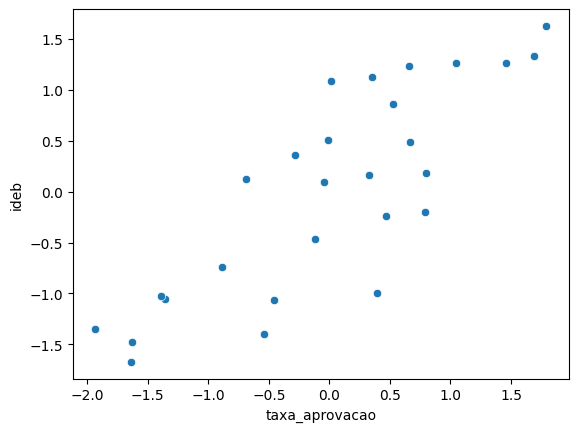

In [45]:
sns.scatterplot(data=df_scaled, x='taxa_aprovacao', y='ideb');

In [46]:
df_scaled[['taxa_aprovacao','ideb']].corr()

,taxa_aprovacao,ideb
taxa_aprovacao,1.00000,0.82351
ideb,0.82351,1.00000


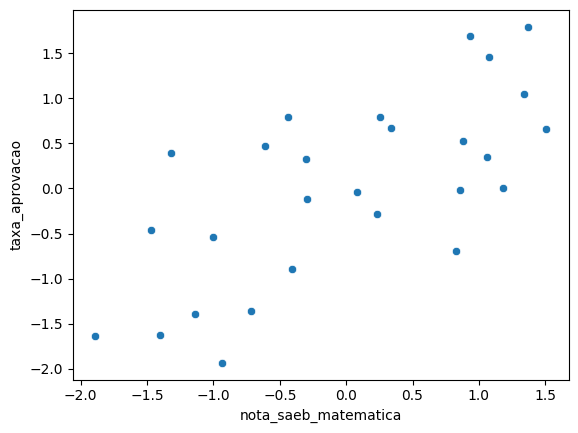

In [47]:
sns.scatterplot(data=df_scaled, x='nota_saeb_matematica', y='taxa_aprovacao');

In [48]:
df_scaled[['taxa_aprovacao','nota_saeb_matematica']].corr()

,taxa_aprovacao,nota_saeb_matematica
taxa_aprovacao,1.000000,0.692981
nota_saeb_matematica,0.692981,1.000000


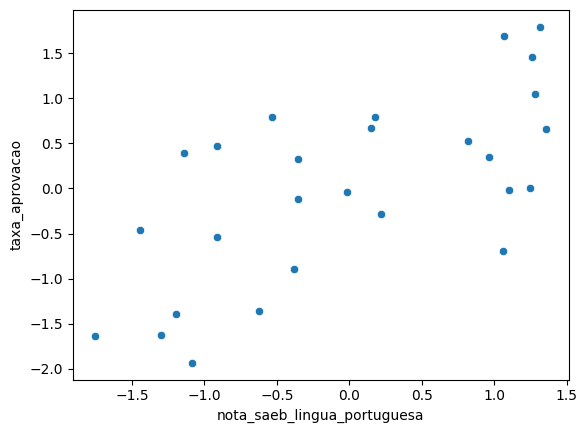

In [49]:
sns.scatterplot(data=df_scaled, x='nota_saeb_lingua_portuguesa', y='taxa_aprovacao');

In [50]:
df_scaled[['taxa_aprovacao','nota_saeb_lingua_portuguesa']].corr()

,taxa_aprovacao,nota_saeb_lingua_portuguesa
taxa_aprovacao,1.000000,0.672152
nota_saeb_lingua_portuguesa,0.672152,1.000000


In [51]:
df_scaled[['nota_saeb_matematica','nota_saeb_lingua_portuguesa']].corr()

,nota_saeb_matematica,nota_saeb_lingua_portuguesa
nota_saeb_matematica,1.000000,0.991216
nota_saeb_lingua_portuguesa,0.991216,1.000000


In [52]:
df_scaled[['ideb','nota_saeb_matematica']].corr()

,ideb,nota_saeb_matematica
ideb,1.000000,0.956578
nota_saeb_matematica,0.956578,1.000000


In [53]:
df_scaled[['ideb','nota_saeb_lingua_portuguesa']].corr()

,ideb,nota_saeb_lingua_portuguesa
ideb,1.000000,0.939014
nota_saeb_lingua_portuguesa,0.939014,1.000000


The tests show strong correlation (results near 1) between the ideb score and the grades and the approval rate.


### Activty 4: Use the elbow method to find the ideal k value.

In [54]:
# selecting figure's settings
sns.set(style='white', font_scale=1.1, rc={'figure.figsize':(14,5)})

In [55]:
# importing the class KMeans from the library scikit-learn (module cluster)
from sklearn.cluster import KMeans

#### *Using approval rate and ideb score*

In [56]:
# creating empty list to store the values found by the loop that will be created next
# This list will store the results of the calculations for each number of clusters (from 2 to 9)
inercia = []

# number of clusters that will be tested
k_min = 2
k_max = 10

# loop
for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['taxa_aprovacao','ideb']])
    inercia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [57]:
inercia

[18.874084718190357,
 10.375729111037913,
 7.50949223469183,
 5.379903433175956,
 3.6234975317366995,
 2.7896358932592245,
 2.3858849870747783,
 2.046466821749733,
 1.7325320363219896]

**Comment**: The wcss (Within Cluster Sum of Squares) or inertia measures the squared average distance of all the points within a cluster to the cluster centroid.

Source: https://odsc.medium.com/unsupervised-learning-evaluating-clusters-bd47eed175ce

In [58]:
# importing matplotlib to add more features to the chart
import matplotlib.pyplot as plt

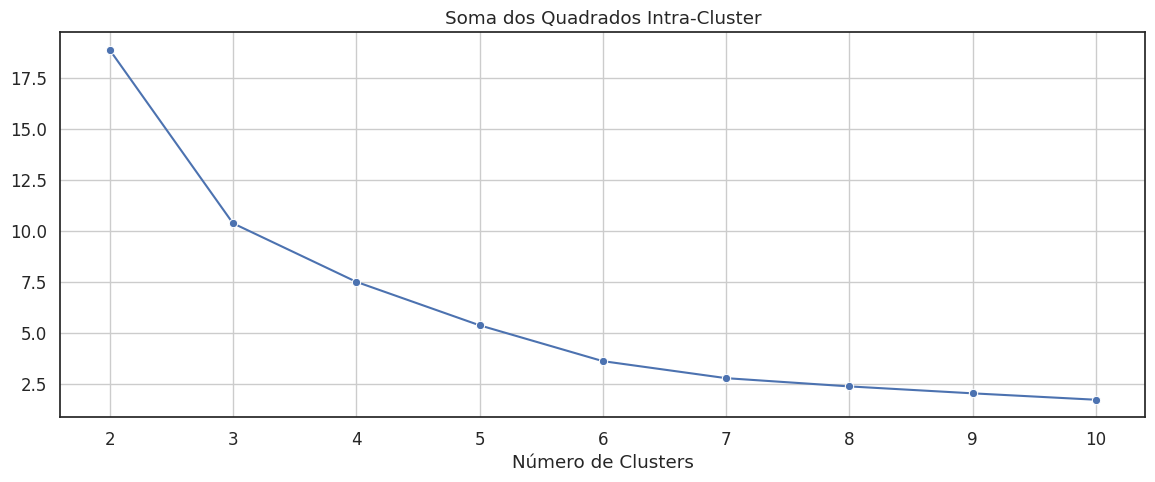

In [59]:
# creating the chart with the elbow method
sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.title('Soma dos Quadrados Intra-Cluster')
plt.xlabel('Número de Clusters')
plt.grid(True)

**Answer**: In this case, the best number of cluster would probably be **4 or 5**, because between 2 and 4 there is a significant drop in the distance among the elements of the groups and from 5 forth, the distance is not that big.

### Activity 5: Use the silhouette method to find the ideal k value.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

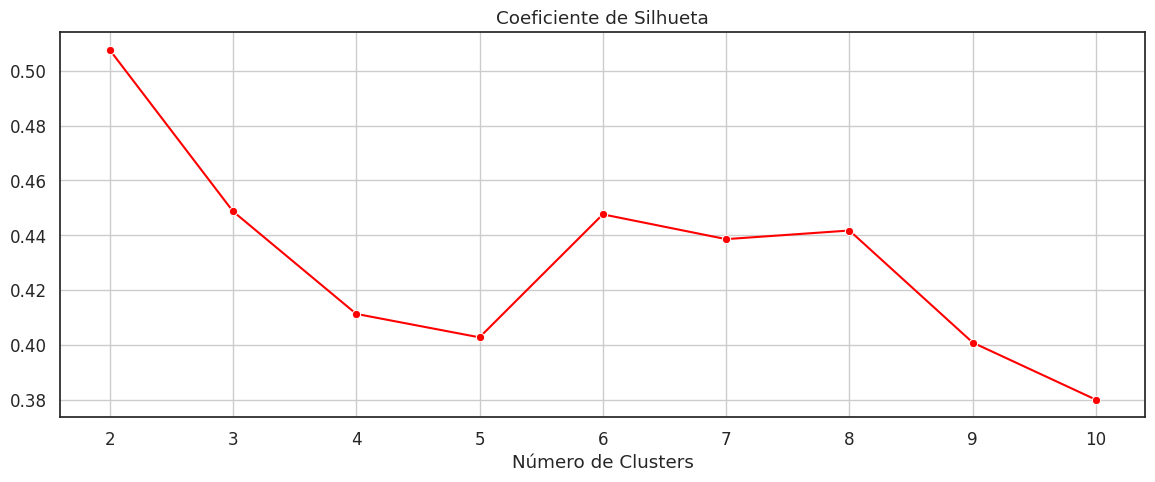

In [60]:
# importing the class silhouette_score from the library scikit-learn (module metrics)
from sklearn.metrics import silhouette_score

# creating the chart with the silhouette method
silhueta = []
k_min = 2
k_max = 10
n = [i for i in range(k_min, k_max+1)]

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['taxa_aprovacao','ideb']])
    silhueta.append(silhouette_score(df_scaled[['taxa_aprovacao','ideb']],
                                     kmeans.labels_,
                                     metric='euclidean'))

sns.lineplot(x=n, y=silhueta, color='red', marker='o')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.grid(True)

**Comment**: The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

**Answer**: The best number of cluster is **6**, because it is number with the highest coefficient after the first one (2).

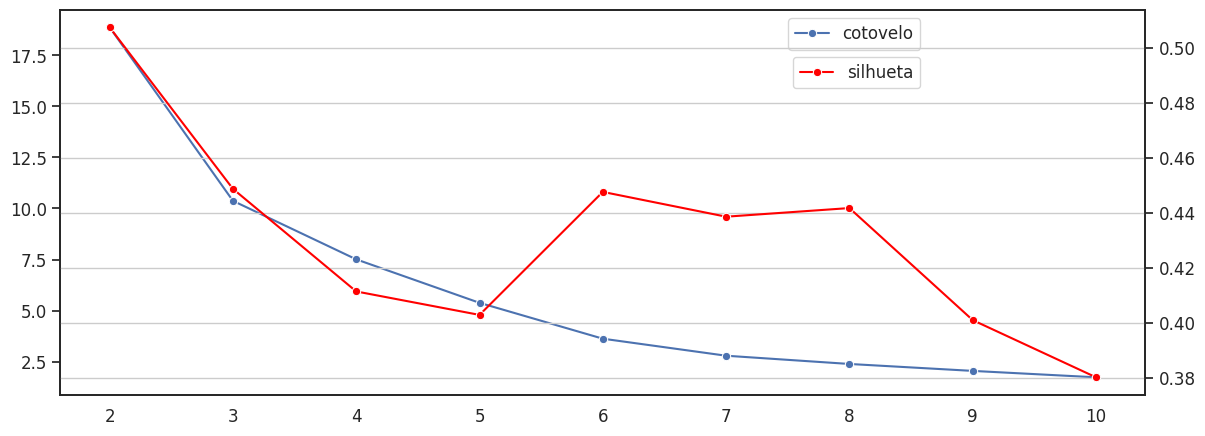

In [61]:
# overlapping the two charts
fig, ax = plt.subplots()
sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.legend(labels=["cotovelo"], bbox_to_anchor=(0.8, 1), loc='upper right')
ax2 = ax.twinx()
sns.lineplot(x=range(k_min,k_max+1), y=silhueta, marker='o', color='red')
plt.legend(labels=["silhueta"], bbox_to_anchor=(0.8, 0.9), loc='upper right');
plt.grid(True)

**Comment**: By overlaying the graph of the elbow method with the silhouette one, it is possible to obtain a more comprehensive view of the quality of the clustering. The inflection point on the elbow plot can indicate a potentially adequate number of clusters, while silhouette analysis can help confirm that the clusters are well defined and separate from each other.

If the number of clusters identified by the elbow method also have high and consistent silhouette scores, this suggests good quality and robust clustering. On the other hand, if the silhouette score is low and inconsistent, even with an apparently adequate number of clusters identified by the elbow method, this may indicate overlapping or ambiguity issues between clusters.

The best number of cluster differs in each chart. It would be best to test 4 to 6 clusters. However, overlapping or ambiguity issues between clusters may come up.

### Activity 6: Perform the clustering analysis using the chosen k value.

## ***Variables: approval rate and ideb score***

## *k = 5*

In [62]:
# instantiating the algorithm
kmeans = KMeans(n_clusters=5, random_state=42)

# applying the algorithm to the data 
kmeans.fit(df_scaled[['taxa_aprovacao','ideb']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [64]:
# checking the created groups
kmeans.labels_

array([0, 0, 3, 1, 1, 2, 0, 4, 2, 3, 4, 0, 0, 1, 3, 0, 3, 2, 0, 1, 0, 3,
       4, 4, 1, 2, 0], dtype=int32)

### Activity 7: Create a scatter plot highlighting each group.

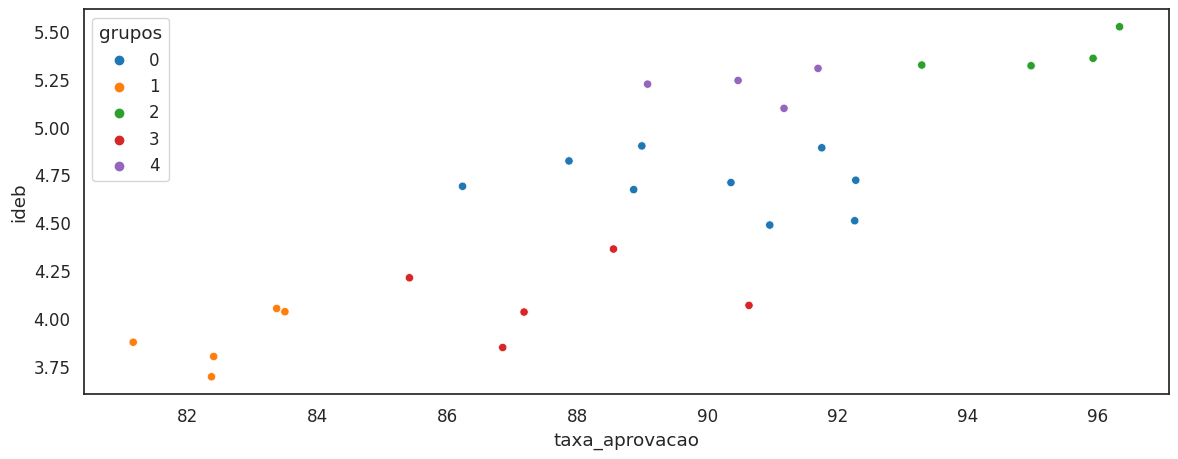

In [73]:
# creating a column called 'grupos'
ideb['grupos'] = kmeans.labels_.tolist()

# showing the groups with different colors in a scatter plot
sns.scatterplot(data=ideb, x='taxa_aprovacao', y='ideb', hue='grupos', palette='tab10');

### Activity 8: What are the states of each group?

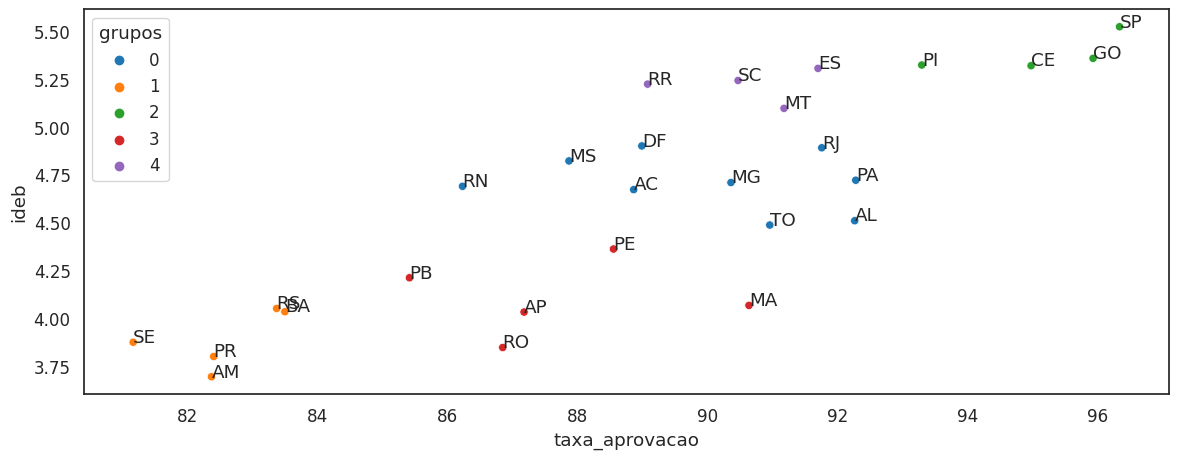

In [74]:
sns.scatterplot(data=ideb, x='taxa_aprovacao', y='ideb', hue='grupos', palette='tab10');

# creating lists that will serve as a support to write down the abbreviation of each state in the chart
aprovacao = ideb['taxa_aprovacao']
ideb3 = ideb['ideb']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# creating a for-loop to give a label to each marker
for i, estado in enumerate(estados):
    plt.annotate(estado, (aprovacao[i], ideb3[i]));

### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

In [75]:
# creating new variables to store each group
df_g0 = ideb[ideb['grupos'] == 0]
df_g0.head()

,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos
0,AC,88.857971,245.253478,237.995942,4.671739,0
1,AL,92.258013,237.883189,231.412708,4.509295,0
6,DF,88.983333,256.365000,252.218333,4.900000,0
11,MS,87.862600,247.440340,240.999820,4.821600,0
12,MT,90.354108,239.775939,233.675939,4.708685,0


In [76]:
df_g1 = ideb[ideb['grupos'] == 1]
df_g1.head()

,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos
3,AP,82.363333,217.216667,215.831111,3.694444,1
4,BA,83.492417,233.942537,230.205596,4.034125,1
13,PA,82.397136,224.131193,221.644141,3.800239,1
19,RN,83.365916,227.868373,222.960532,4.051177,1
24,SE,81.158960,230.750829,224.307726,3.874759,1


In [77]:
df_g2 = ideb[ideb['grupos'] == 2]
df_g2.head()

,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos
5,CE,94.970804,259.397187,254.290339,5.318929,2
8,GO,95.924574,257.356514,251.849397,5.357471,2
17,PR,93.289210,263.138800,254.573522,5.322486,2
25,SP,96.331815,263.598144,254.955744,5.522421,2


In [78]:
df_g3 = ideb[ideb['grupos'] == 3]
df_g3.head()

,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos
2,AM,87.171490,223.121965,219.773218,4.032397,3
9,MA,90.631444,225.296995,223.669534,4.067158,3
14,PB,85.408397,238.299160,233.329475,4.211407,3
16,PI,88.547080,239.853022,233.638533,4.361533,3
21,RR,86.843056,229.807361,226.552361,3.847222,3


In [79]:
df_g4 = ideb[ideb['grupos'] == 4]
df_g4.head()

,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos
7,ES,91.693525,265.574820,255.552122,5.305036,4
10,MG,91.170292,256.630277,248.653496,5.096277,4
22,RS,89.071823,260.966337,254.151809,5.222730,4
23,SC,90.463610,259.174860,250.534567,5.241834,4


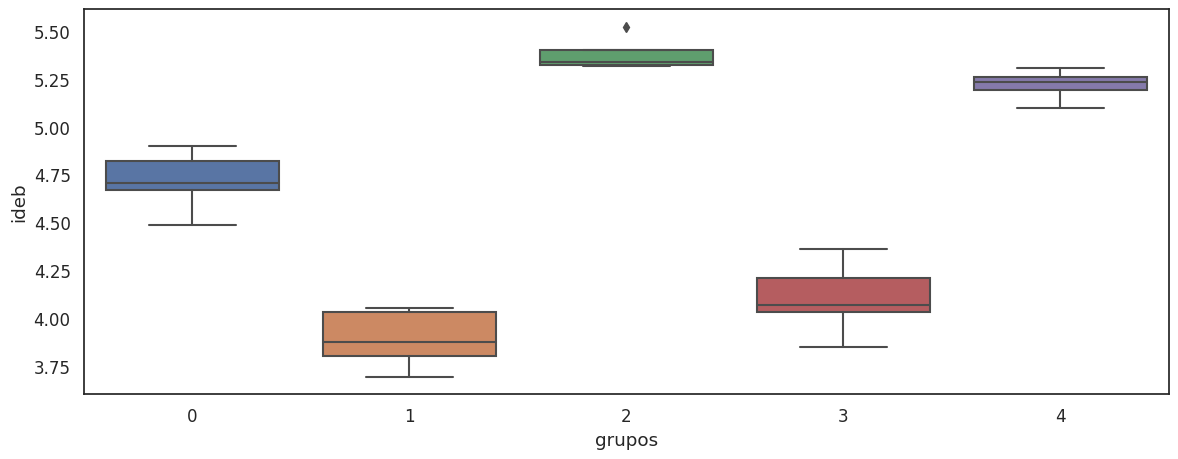

In [80]:
# merging the created datasets
df_final = pd.concat([df_g0, df_g1, df_g2, df_g3, df_g4])

# ploting per ideb score
sns.boxplot(x=df_final['grupos'], y=df_final['ideb']);

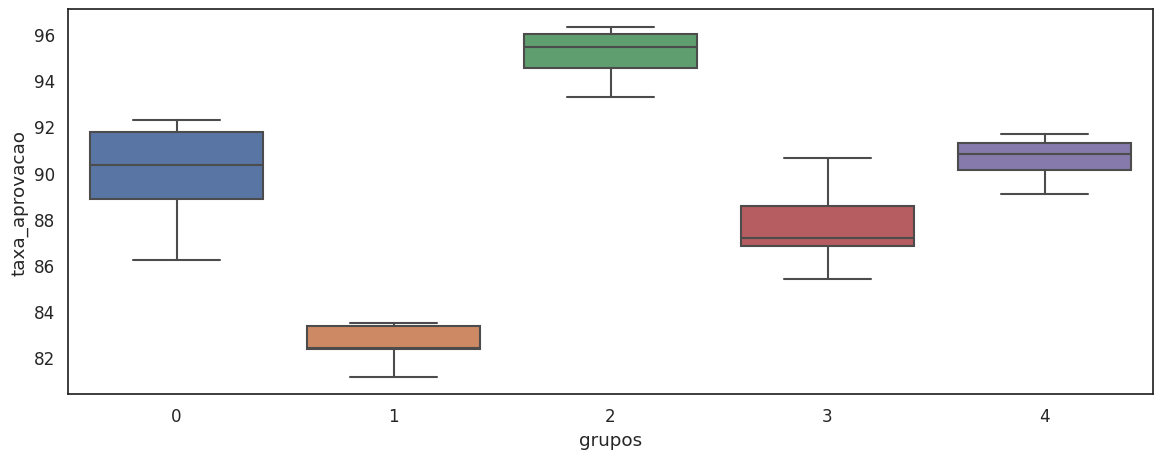

In [81]:
# ploting per approval rate
sns.boxplot(x=df_final['grupos'], y=df_final['taxa_aprovacao']);

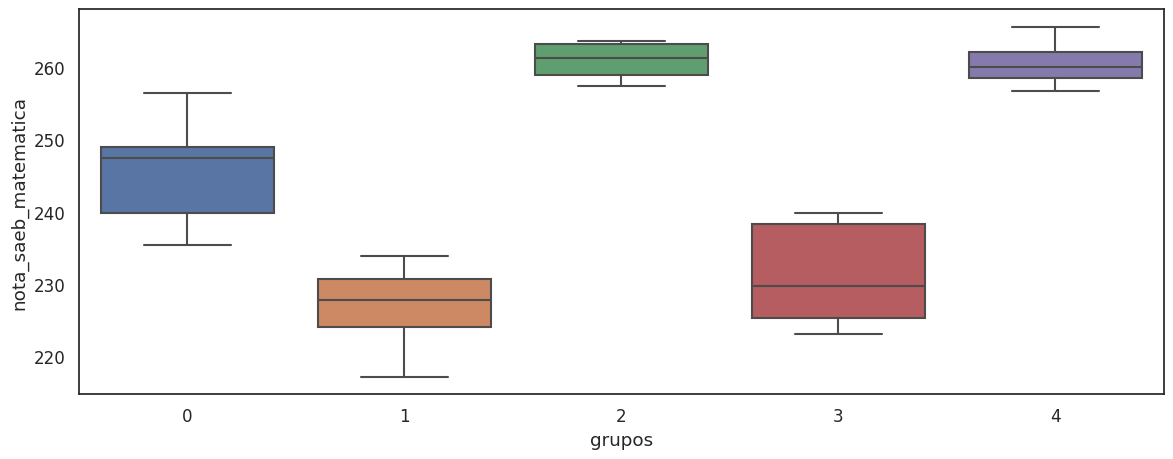

In [82]:
# ploting per Saeb math
sns.boxplot(x=df_final['grupos'], y=df_final['nota_saeb_matematica']);

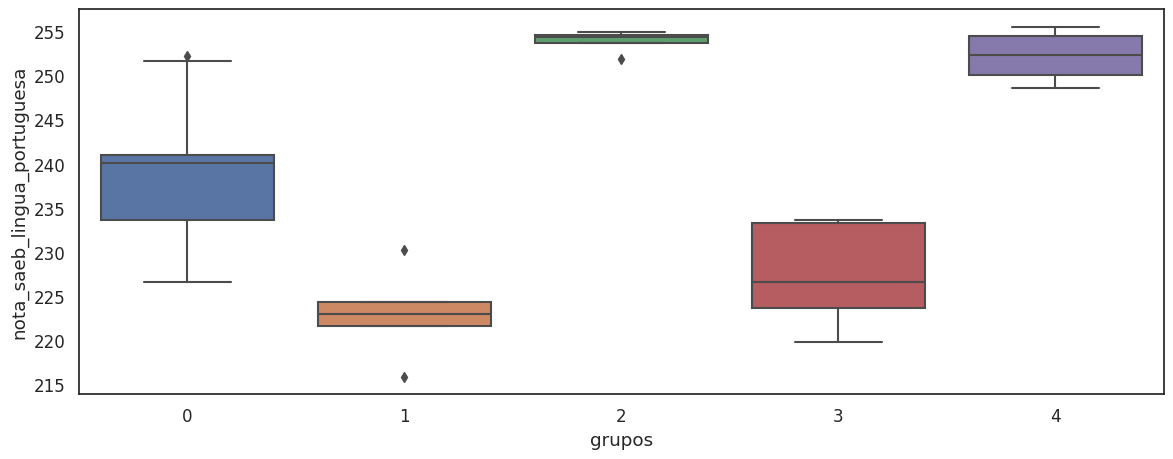

In [83]:
# ploting per Saeb portuguese
sns.boxplot(x=df_final['grupos'], y=df_final['nota_saeb_lingua_portuguesa']);

### Activity 10: Are the groups statistically different, i.e., was the data properly clusterized?

In [ ]:
# checking the mean and median by group

In [84]:
df_final2 = df_final.groupby(by='grupos').mean()
df_final2

<ipython-input-84-03d1d365f764>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final2 = df_final.groupby(by='grupos').mean()


,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
grupos,,,,
0,89.946408,246.084380,239.461409,4.710950
1,82.555552,226.781920,222.989821,3.890949
2,95.129101,260.872661,253.917250,5.380327
3,87.720294,231.275701,227.392624,4.103943
4,90.599813,260.586574,252.222999,5.216469


In [85]:
df_final3 = df_final.groupby(by='grupos').median()
df_final3

<ipython-input-85-04599902171a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final3 = df_final.groupby(by='grupos').median()


,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
grupos,,,,
0,90.354108,247.440340,240.107758,4.708685
1,82.397136,227.868373,222.960532,3.874759
2,95.447689,261.267994,254.431931,5.339978
3,87.171490,229.807361,226.552361,4.067158
4,90.816951,260.070598,252.343188,5.232282


Performing an ANOVA test to test if h0 = ideb score averages of the groups are the same or h1 = ideb score averages of the groups are different. α = 0,05

In [86]:
# importing the f_oneway function from the package Scipy
from scipy.stats import f_oneway

In [87]:
# using scipy.stats.f_oneway to test the hypothesis
f_oneway(df_g0['ideb'],
         df_g1['ideb'],
         df_g2['ideb'],
         df_g3['ideb'],
         df_g4['ideb'])

F_onewayResult(statistic=91.74819311988576, pvalue=2.1545372261203366e-13)

Conclusion: The result of the anova test gives a p-value of 2.1545372261203366e-13, which is below 0,05. This shows strong evidence that the null hypothesis should be rejected, i.e., **the ideb score average for at least one of the groups differs from the others**.

A post-hoc test for multiple variable could confirm the conclusion.

In [ ]:
# installing scikit posthocs

In [88]:
pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
# importing scikit posthocs
import scikit_posthocs as sp

In [90]:
# using bonferroni to see the difference among the groups for variable approval rate

p_values_taxa = sp.posthoc_dunn(df_final, group_col = 'grupos', val_col= 'taxa_aprovacao', p_adjust = 'bonferroni')
p_values_taxa

,0,1,2,3,4
0,1.000000,0.042216,0.392433,1.000000,1.000000
1,0.042216,1.000000,0.000238,1.000000,0.074435
2,0.392433,0.000238,1.000000,0.040592,1.000000
3,1.000000,1.000000,0.040592,1.000000,1.000000
4,1.000000,0.074435,1.000000,1.000000,1.000000


In [91]:
# checking if p_values are higher than the level of significance
# False represents that the null hypothesis is rejected, i.e., the ideb score average differs from the other group
p_values_taxa > 0.05

,0,1,2,3,4
0,True,False,True,True,True
1,False,True,False,True,True
2,True,False,True,False,True
3,True,True,False,True,True
4,True,True,True,True,True


In [92]:
# using bonferroni to see the difference among the groups for variable ideb score
p_values_ideb = sp.posthoc_dunn(df_final, group_col = 'grupos', val_col= 'ideb', p_adjust = 'bonferroni')
p_values_ideb

,0,1,2,3,4
0,1.000000,0.129680,0.277078,0.707598,1.000000
1,0.129680,1.000000,0.000539,1.000000,0.010136
2,0.277078,0.000539,1.000000,0.005118,1.000000
3,0.707598,1.000000,0.005118,1.000000,0.064638
4,1.000000,0.010136,1.000000,0.064638,1.000000


In [93]:
p_values_ideb > 0.05

,0,1,2,3,4
0,True,True,True,True,True
1,True,True,False,True,False
2,True,False,True,False,True
3,True,True,False,True,True
4,True,False,True,True,True


In [94]:
p_values_math = sp.posthoc_dunn(df_final, group_col = 'grupos', val_col= 'nota_saeb_matematica', p_adjust = 'bonferroni')
p_values_math > 0.05

,0,1,2,3,4
0,True,True,True,True,True
1,True,True,False,True,False
2,True,False,True,False,True
3,True,True,False,True,False
4,True,False,True,False,True


In [95]:
p_values_port = sp.posthoc_dunn(df_final, group_col = 'grupos', val_col= 'nota_saeb_lingua_portuguesa', p_adjust = 'bonferroni')
p_values_port > 0.05

,0,1,2,3,4
0,True,True,True,True,True
1,True,True,False,True,False
2,True,False,True,False,True
3,True,True,False,True,True
4,True,False,True,True,True


**Answer**: Taking into account the comparison of the groups in the boxplot graphs above,  the numbers of the means and medians of the groups, and the anova test, it is observed that there is much overlap between the groups. Maybe a smaller number of clusters would be best.

### Atividade 11: Perform the clustering analysis using another K value.

## ***Variables: approval rate and ideb score***

## *k = 4*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



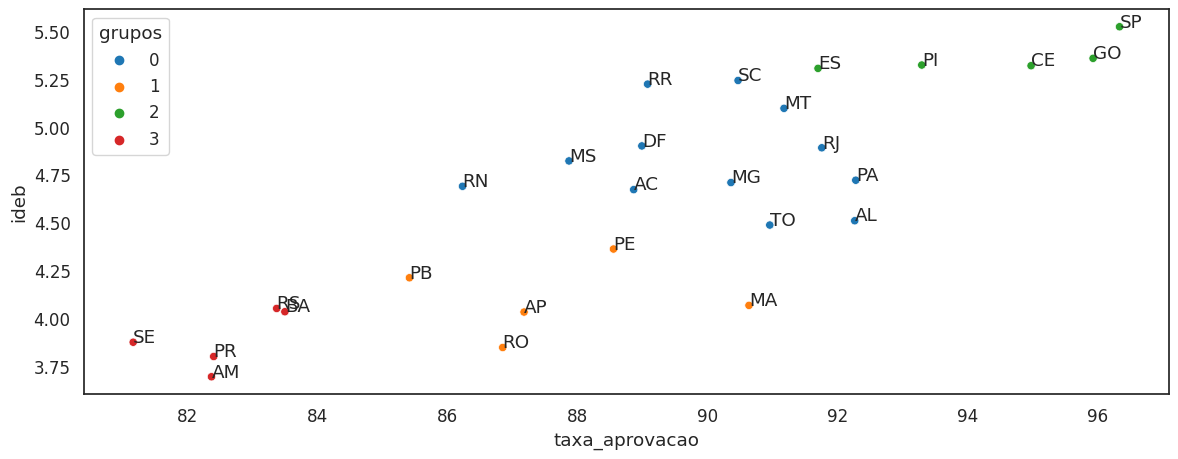

In [97]:
ideb_k4 = ideb.copy()

kmeans2 = KMeans(n_clusters=4, random_state=42)
kmeans2.fit(df_scaled[['taxa_aprovacao','ideb']])
ideb_k4['grupos'] = kmeans2.labels_.tolist()
sns.scatterplot(data=ideb_k4, x='taxa_aprovacao', y='ideb', hue='grupos', palette='tab10');
aprovacao = ideb_k4['taxa_aprovacao']
ideb3 = ideb_k4['ideb']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']
for i, estado in enumerate(estados):
    plt.annotate(estado, (aprovacao[i], ideb3[i]));

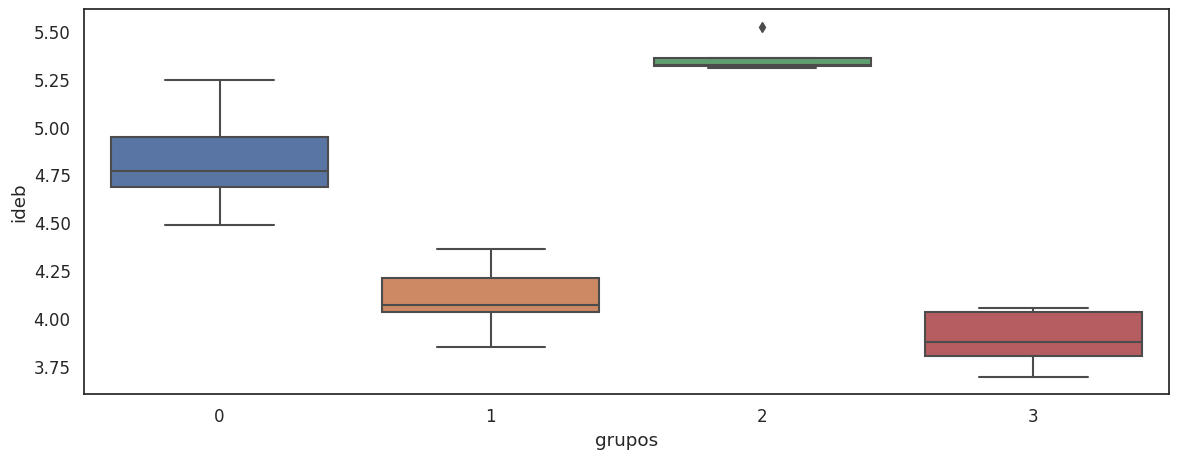

In [98]:
df_g10 = ideb_k4[ideb_k4['grupos'] == 0]
df_g11 = ideb_k4[ideb_k4['grupos'] == 1]
df_g12 = ideb_k4[ideb_k4['grupos'] == 2]
df_g13 = ideb_k4[ideb_k4['grupos'] == 3]
df_final6 = pd.concat([df_g10, df_g11, df_g12, df_g13])
sns.boxplot(x=df_final6['grupos'], y=df_final6['ideb']);

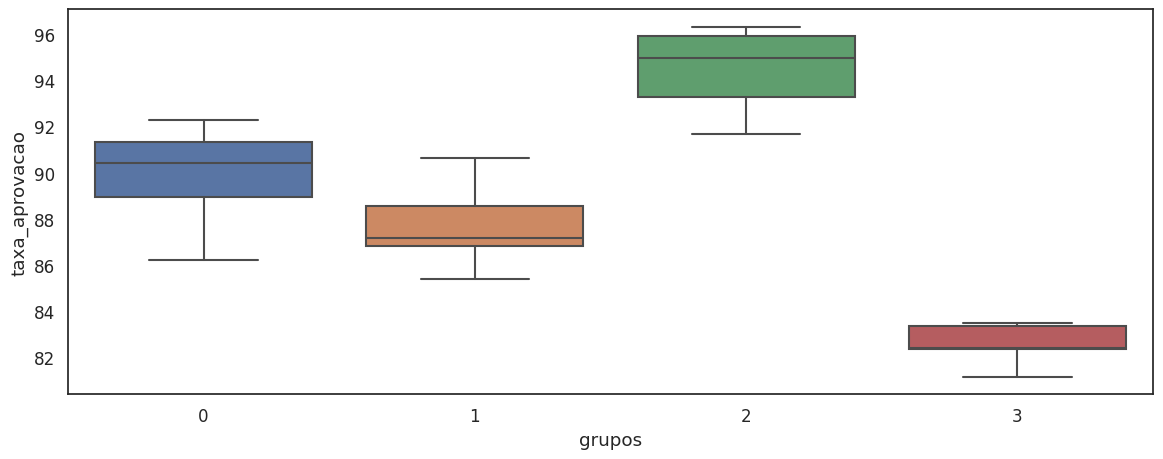

In [99]:
sns.boxplot(x=df_final6['grupos'], y=df_final6['taxa_aprovacao']);

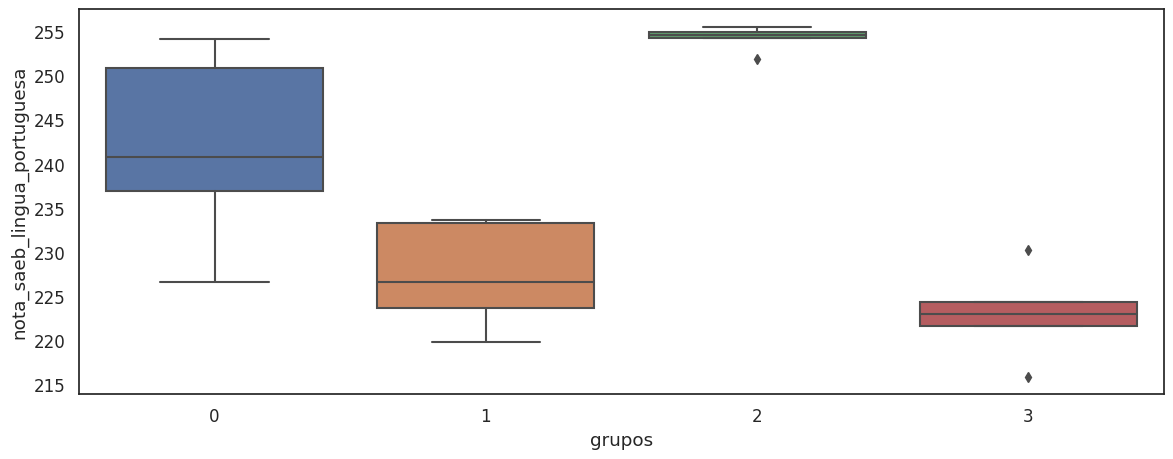

In [100]:
sns.boxplot(x=df_final6['grupos'], y=df_final6['nota_saeb_lingua_portuguesa']);

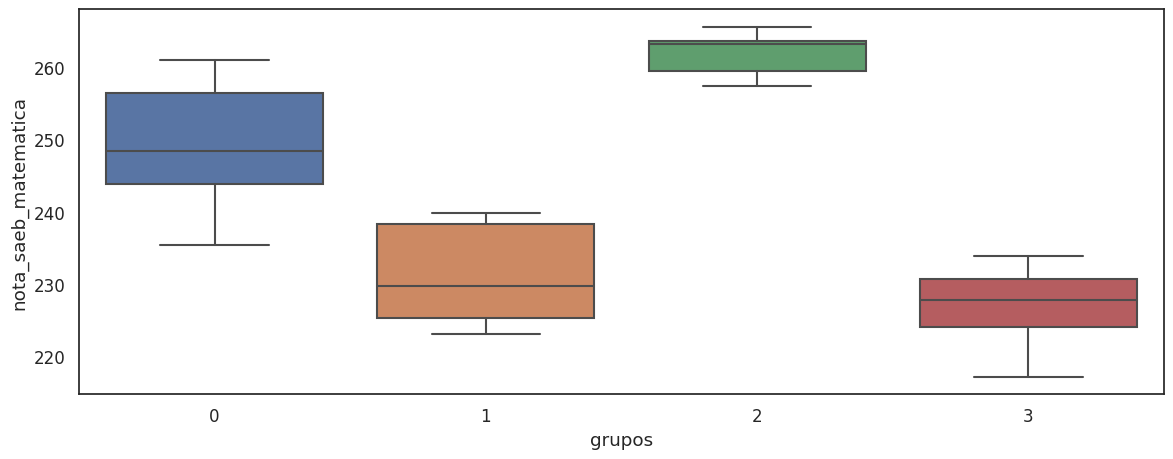

In [101]:
sns.boxplot(x=df_final6['grupos'], y=df_final6['nota_saeb_matematica']);

In [102]:
df_final7 = df_final6.groupby(by='grupos').mean()
df_final7

<ipython-input-102-41e79e3a0002>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
grupos,,,,
0,90.018617,249.294241,242.374379,4.829949
1,87.720294,231.275701,227.392624,4.103943
2,94.441986,261.813093,254.244225,5.365268
3,82.555552,226.781920,222.989821,3.890949


In [103]:
df_final8 = df_final6.groupby(by='grupos').median()
df_final8

<ipython-input-103-9c049ae34eda>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
grupos,,,,
0,90.408859,248.353409,240.749757,4.771268
1,87.171490,229.807361,226.552361,4.067158
2,94.970804,263.138800,254.573522,5.322486
3,82.397136,227.868373,222.960532,3.874759


In [104]:
f_oneway(df_g10['ideb'],
         df_g11['ideb'],
         df_g12['ideb'],
         df_g13['ideb'])

F_onewayResult(statistic=57.57684464569191, pvalue=7.542508219427153e-11)

In [105]:
p_values_taxa1 = sp.posthoc_dunn(df_final6, group_col = 'grupos', val_col= 'taxa_aprovacao', p_adjust = 'bonferroni')
p_values_taxa1 > 0.05

,0,1,2,3
0,True,True,True,False
1,True,True,False,True
2,True,False,True,False
3,False,True,False,True


In [106]:
p_values_math1 = sp.posthoc_dunn(df_final6, group_col = 'grupos', val_col= 'nota_saeb_matematica', p_adjust = 'bonferroni')
p_values_math1 > 0.05

,0,1,2,3
0,True,True,True,False
1,True,True,False,True
2,True,False,True,False
3,False,True,False,True


In [107]:
p_values_port1 = sp.posthoc_dunn(df_final6, group_col = 'grupos', val_col= 'nota_saeb_lingua_portuguesa', p_adjust = 'bonferroni')
p_values_port1 > 0.05

,0,1,2,3
0,True,True,True,False
1,True,True,False,True
2,True,False,True,False
3,False,True,False,True


### Activity 12: Which k value seems to be the most adequate?

**Answer**: The k value = 5 seems to be the most adequate, given that the tests show that, with k = 5, the groups seem more different from each other.

### Activity 13: How could the clustering analysis be performed using more than two variables at once?

## ***Variables: approval rate, Saeb math and ideb score***

## *k = 5*

In [96]:
# using a different library to plot a third variable
import plotly.express as px

# ploting with 3 variables
figura = px.scatter_3d(ideb, x='nota_saeb_matematica', y='ideb', z='taxa_aprovacao', color='grupos', text='sigla_uf');
figura

## *k = 4*

In [108]:
# using a different library to plot a third variable
import plotly.express as px

# ploting with 3 variables
figura = px.scatter_3d(ideb_k4, x='nota_saeb_matematica', y='ideb', z='taxa_aprovacao', color='grupos', text='sigla_uf');
figura